In [65]:
#import packages we need
import pandas as pd
import numpy as np
import json
import subprocess
from thefuzz import fuzz
from thefuzz import process
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
vivino_data = pd.read_csv('vivino_data.csv')
full_wine = pd.read_csv('full_wine.csv')


In [67]:

inner_wine= full_wine.merge(vivino_data, left_on = 'productId_ArtId', right_on = 'productId', how='inner' )

In [68]:
inner_wine.columns

Index(['alcoholPercentage', 'assortmentText', 'grapes', 'packagingLevel1',
       'sugarContentGramPer100ml', 'supplierName', 'tasteClockBody',
       'tasteClockOakFlavor', 'tasteClockAcidity', 'tasteClockTannins',
       'tasteClockSweetness', 'tasteClocks', 'tasteSymbols', 'vintage',
       'volumeText', 'productNumber_Artnr', 'productNumberShort_Varunr',
       'Name', 'Producer_Name', 'Product_Group_Details', 'Headline',
       'Actual_Price', 'Country', 'Region', 'origin', 'productId_ArtId',
       'Units_sold', 'productId', 'full_name', 'wine_matches', 'best_match',
       'match_name', 'match_percentage', 'match_reference',
       'best_match_details', 'vivino_name', 'vivino_link', 'vivino_country',
       'vivino_region', 'vivino_average_rating', 'vivino_price'],
      dtype='object')

In [69]:
#remove empty values
inner_wine= inner_wine[inner_wine['vivino_average_rating'].isna() == False]


In [70]:
#make a csv
inner_wine.to_csv('inner_wine.csv', encoding= 'utf-8', index= False, sep= ',' )

In [71]:
interesting_columns= ['alcoholPercentage', 'assortmentText', 'grapes', 'packagingLevel1',
       'sugarContentGramPer100ml', 'tasteClockBody', 'tasteClockOakFlavor',
       'tasteClockAcidity', 'tasteClockTannins', 'tasteClockSweetness',
       'tasteClocks', 'tasteSymbols', 'vintage', 'volumeText',
       'productNumber_Artnr', 'productNumberShort_Varunr', 'Name',
       'Product_Group_Details', 'Actual_Price', 'Country', 'Region', 'origin',
       'productId_ArtId', 'Units_sold', 'productId', 'full_name',
       'wine_matches', 'best_match', 'match_name', 'match_percentage',
       'match_reference', 'best_match_details', 'vivino_name', 'vivino_link',
       'vivino_country', 'vivino_region', 'vivino_average_rating',
       'vivino_price']
inner_wine.describe()

,alcoholPercentage,sugarContentGramPer100ml,tasteClockBody,tasteClockOakFlavor,tasteClockAcidity,tasteClockTannins,tasteClockSweetness,vintage,productNumber_Artnr,productNumberShort_Varunr,Actual_Price,productId_ArtId,Units_sold,productId,match_percentage,match_reference,vivino_average_rating,vivino_price
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.000000,1.280000e+02,128.000000,1.280000e+02,128.000000,128.000000,128.000000,65.00000
mean,13.546875,0.317969,7.093750,5.234375,9.414062,5.203125,0.375000,2020.429688,3.275212e+06,32752.109375,212.992188,8.747130e+06,83191.031250,8.747130e+06,98.179688,7.296875,3.814844,41.48200
std,1.078490,0.443933,2.009574,3.103172,0.582248,3.990854,0.575073,1.764406,3.299029e+06,32990.289697,204.141201,1.139038e+07,122594.097049,1.139038e+07,3.344836,43.486872,0.265641,42.19812
min,9.500000,0.000000,3.000000,1.000000,8.000000,0.000000,0.000000,2013.000000,2.007010e+05,2007.000000,79.000000,1.721000e+03,206.000000,1.721000e+03,90.000000,0.000000,3.300000,9.97000
25%,13.000000,0.000000,5.000000,1.000000,9.000000,0.000000,0.000000,2020.000000,4.384010e+05,4384.000000,115.000000,5.406382e+05,14094.500000,5.406382e+05,100.000000,0.000000,3.600000,18.99000
50%,13.500000,0.000000,7.000000,4.000000,9.000000,7.000000,0.000000,2021.000000,1.234351e+06,12343.500000,159.000000,9.931440e+05,40708.500000,9.931440e+05,100.000000,0.000000,3.800000,29.99000
75%,14.500000,0.500000,9.000000,8.000000,10.000000,9.000000,1.000000,2022.000000,7.345826e+06,73458.250000,249.000000,2.336586e+07,100765.250000,2.336586e+07,100.000000,0.000000,4.000000,45.00000
max,16.500000,2.400000,10.000000,10.000000,10.000000,11.000000,3.000000,2023.000000,8.728201e+06,87282.000000,1899.000000,3.849519e+07,879214.000000,3.849519e+07,100.000000,467.000000,4.600000,247.91000


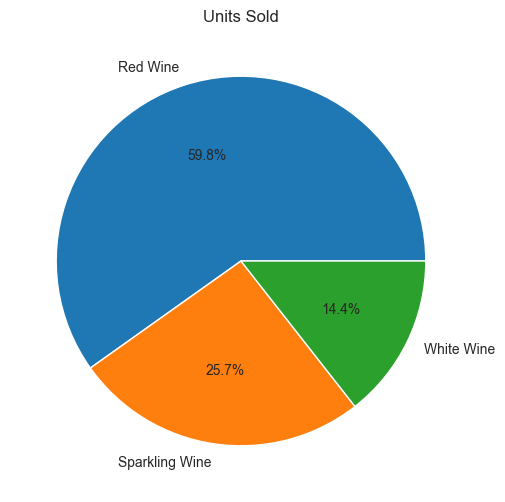

In [72]:

more_pie_data=inner_wine.groupby('Product_Group_Details')['Units_sold'].sum()

categories = list(more_pie_data.keys())

data_pie = list(more_pie_data.values)


sns.set_style("whitegrid") 
plt.figure(figsize=(6, 6)) 
plt.pie(data_pie, labels=categories, autopct='%1.1f%%')
plt.title('Units Sold')
plt.show() 


In [73]:
inner_wine_white=inner_wine[inner_wine['Product_Group_Details'] == 'White Wine']
inner_wine_red = inner_wine[inner_wine['Product_Group_Details'] == 'Red Wine']
inner_wine_sparkling = inner_wine [inner_wine['Product_Group_Details'] == 'Sparkling Wine']

<Axes: >

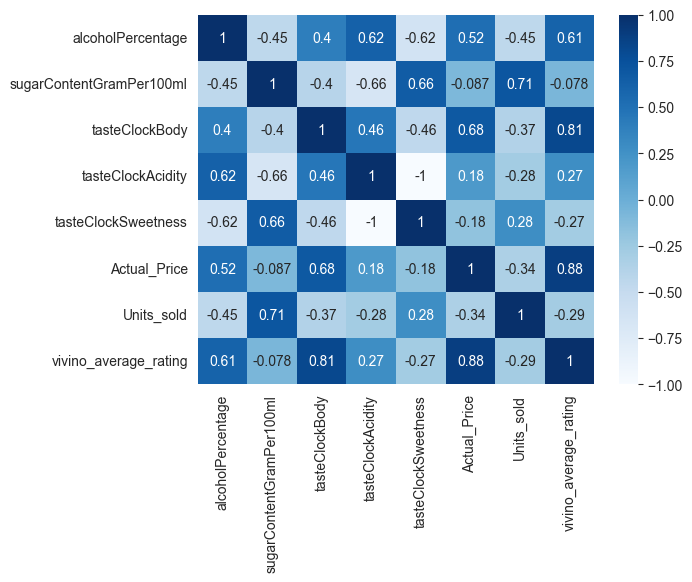

In [83]:


sns.heatmap(inner_wine_sparkling.iloc[:][['alcoholPercentage', 
       'sugarContentGramPer100ml', 'tasteClockBody', 
       
       'tasteClockAcidity',  'tasteClockSweetness', 
        'Actual_Price',  'Units_sold','vivino_average_rating']].corr(),cmap="Blues",annot=True)




# Look at prices

In [84]:
#calculate the price in USD for 2023
inner_wine['Actual_Price_in_USD'] = inner_wine['Actual_Price']/10.61284



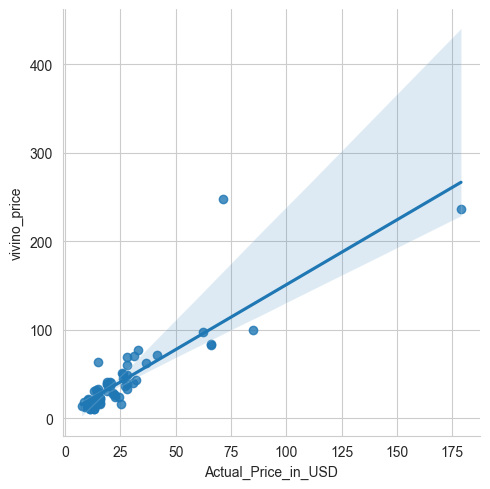

In [96]:
sns.lmplot(data= inner_wine, x= 'Actual_Price_in_USD', y = 'vivino_price')

In [95]:
inner_wine.sort_values('Actual_Price')
inner_wine.columns

interesting_columns = [
       'Name', 'Actual_Price_in_USD','vivino_price']
inner_wine[interesting_columns].tail()

,Name,Actual_Price_in_USD,vivino_price
125,Borgogno Barolo Riserva,65.863614,82.16
126,Château La Grave à Pomerol Trigant de Boisset,65.863614,84.17
127,Amarone della Valpolicella Classico Campo del ...,71.328692,247.91
128,Chassagne-Montrachet Joseph Drouhin,84.708711,99.97
129,Bollinger La Grande Année Brut,178.934197,237.00
